In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report

# Load the dataset
file_path = 'TrainDataset2024.xls'
data = pd.read_excel(file_path)

In [22]:
# Replace '999' with NaN for missing data
data.replace(999, np.nan, inplace=True)

# Remove rows with missing target values
data.dropna(subset=['pCR (outcome)', 'RelapseFreeSurvival (outcome)'], inplace=True)

In [24]:
# Separate features and targets for classification and regression
X = data.drop(columns=['pCR (outcome)', 'RelapseFreeSurvival (outcome)'])
y_classification = data['pCR (outcome)']
y_regression = data['RelapseFreeSurvival (outcome)']

# Retain important features ER, HER2, and Gene
important_features = ['ER', 'HER2', 'Gene']
X_important = X[important_features]

In [26]:
# Impute missing values using KNNImputer
imputer = KNNImputer(n_neighbors=5)
X_important_imputed = imputer.fit_transform(X_important)

In [28]:
# Normalize the important features
scaler = StandardScaler()
X_important_scaled = scaler.fit_transform(X_important_imputed)

In [30]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_important_scaled)

In [32]:
# Split the data into training and testing sets for classification
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X_pca, y_classification, test_size=0.2, random_state=42)

# Split the data into training and testing sets for regression
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(
    X_pca, y_regression, test_size=0.2, random_state=42)

In [34]:
# Hyperparameter tuning for RandomForestClassifier using GridSearchCV
param_grid_clf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_clf, cv=5)
clf.fit(X_train_classification, y_train_classification)
y_pred_classification = clf.predict(X_test_classification)
classification_accuracy = accuracy_score(y_test_classification, y_pred_classification)

In [35]:
# Hyperparameter tuning for RandomForestRegressor using GridSearchCV
param_grid_reg = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
reg = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_reg, cv=5)
reg.fit(X_train_regression, y_train_regression)
y_pred_regression = reg.predict(X_test_regression)
regression_mse = mean_squared_error(y_test_regression, y_pred_regression)

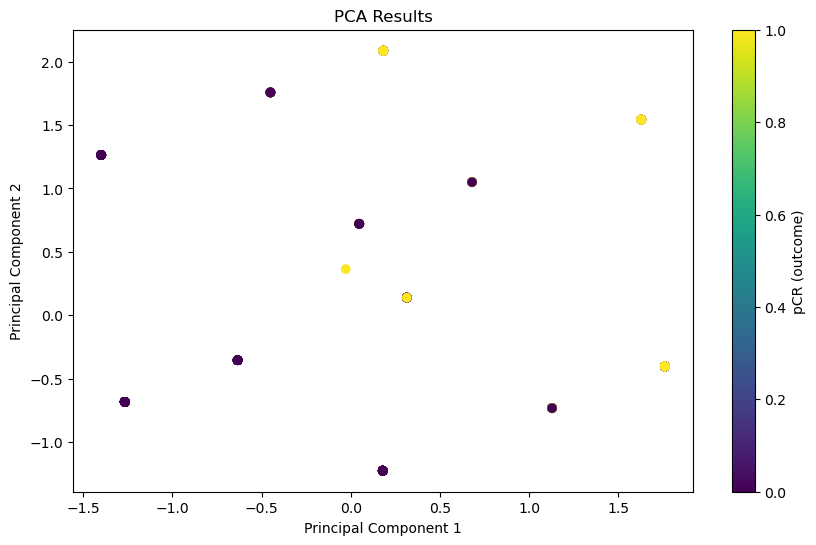

In [36]:
# PCA results visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_classification)
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='pCR (outcome)')
plt.show()

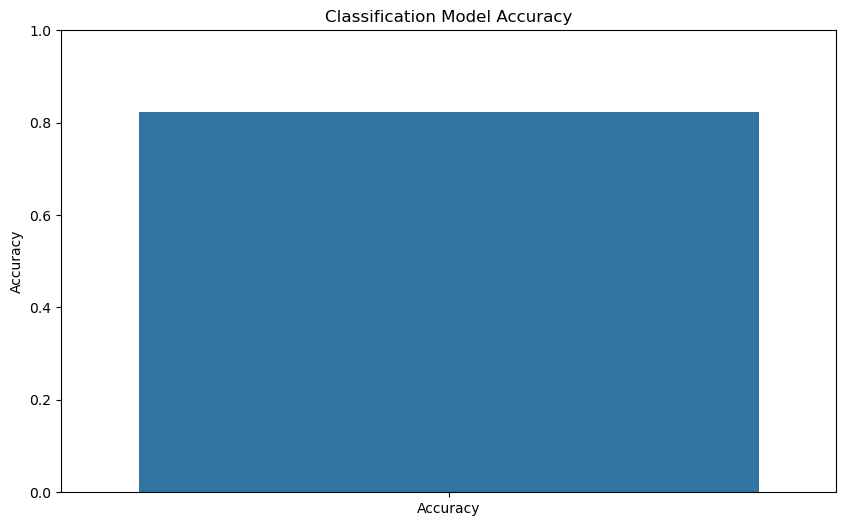

In [38]:
# Classification results visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=['Accuracy'], y=[classification_accuracy])
plt.ylim(0, 1)
plt.title('Classification Model Accuracy')
plt.ylabel('Accuracy')
plt.show()

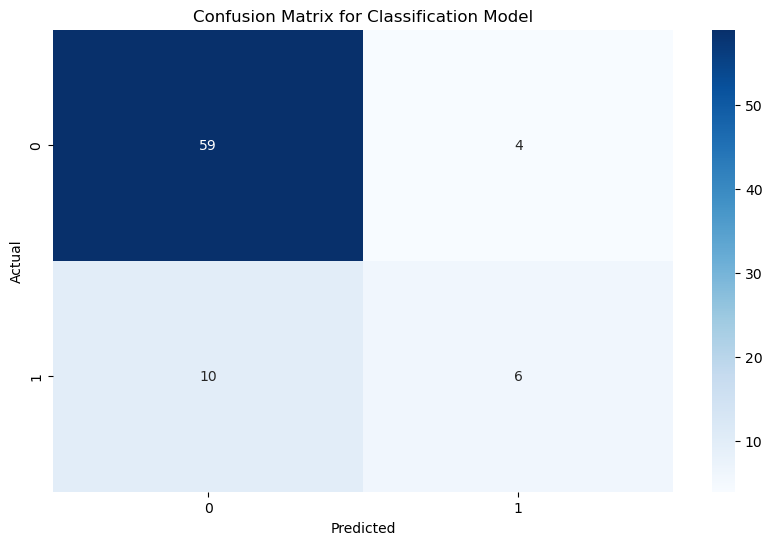

In [39]:
# Confusion matrix visualization for classification model
conf_matrix = confusion_matrix(y_test_classification, y_pred_classification)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Classification Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [40]:
# Classification report visualization
class_report = classification_report(y_test_classification, y_pred_classification)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.94      0.89        63
         1.0       0.60      0.38      0.46        16

    accuracy                           0.82        79
   macro avg       0.73      0.66      0.68        79
weighted avg       0.80      0.82      0.81        79



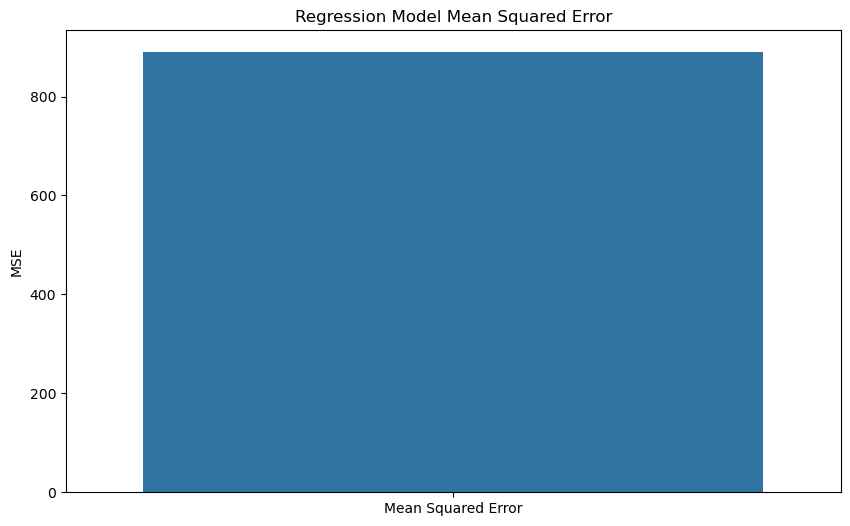

In [41]:
# Regression results visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=['Mean Squared Error'], y=[regression_mse])
plt.title('Regression Model Mean Squared Error')
plt.ylabel('MSE')
plt.show()

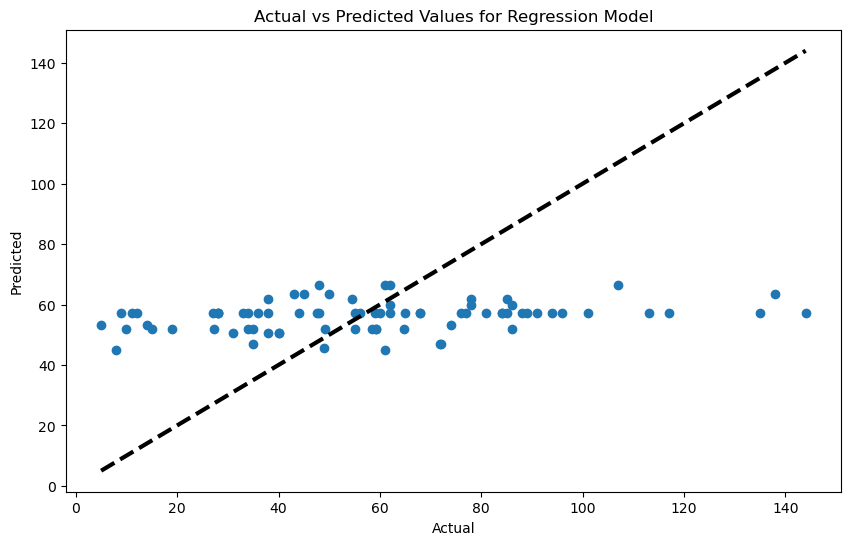

In [48]:
# Scatter plot of actual vs predicted values for regression model
plt.figure(figsize=(10, 6))
plt.scatter(y_test_regression, y_pred_regression)
plt.plot([y_test_regression.min(), y_test_regression.max()], [y_test_regression.min(), y_test_regression.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values for Regression Model')
plt.show()

In [66]:
print(f"""Classification Accuracy:- {classification_accuracy} 
Regression Mean Squared Error:-{regression_mse}""")

Classification Accuracy:- 0.8227848101265823 
Regression Mean Squared Error:-889.4166470951634
